#**Python Notebook**

In [ ]:
!pip install tensorflow-gpu==2.0.0rc0

     |████████████████████████████████| 380.5MB 25kB/s 
     |████████████████████████████████| 4.3MB 38.0MB/s 
     |████████████████████████████████| 501kB 52.8MB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense , Dropout , BatchNormalization , Conv2D , MaxPool2D 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
data=pd.read_csv('/content/gdrive/My Drive/crop_train.csv')
data.head()

,Id,Name,Corn,Cotton,Rice,Wheat
0,corn_crop001,Corn,1,0,0,0
1,corn_crop002,Corn,1,0,0,0
2,corn_crop003,Corn,1,0,0,0
3,corn_crop004,Corn,1,0,0,0
4,corn_crop005,Corn,1,0,0,0


In [ ]:
img_height=350
img_width=350

X=[]

for i in tqdm(range(data.shape[0])):
  path='/content/gdrive/My Drive/images/'+data['Id'][i]+'.jpg'
  img=image.load_img(path,target_size=(img_height,img_width,3))
  img=image.img_to_array(img)
  img=img/255.0
  X.append(img)

X=np.array(X)

 28%|██▊       | 1520/5501 [07:16<19:01,  3.49it/s]

In [ ]:
X.shape

(5501, 350, 350, 3)

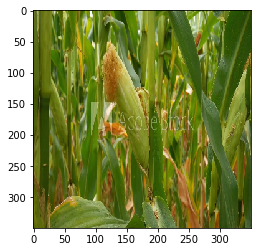

In [ ]:
plt.imshow(X[1])


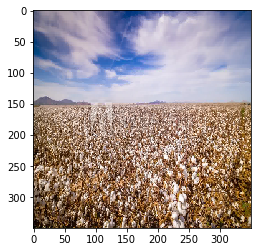

In [ ]:
plt.imshow(X[2001])


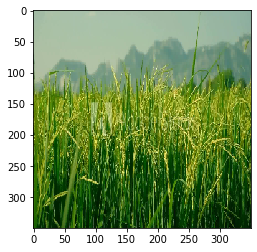

In [ ]:
plt.imshow(X[3999])


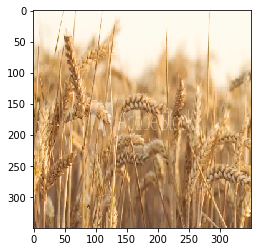

In [ ]:
plt.imshow(X[5001])

In [ ]:
data['Name'][1]

'Corn'

In [ ]:
data['Name'][2000]

'Cotton'

In [ ]:
data['Name'][4000]

'Rice'

In [ ]:
data['Name'][5000]

'Wheat'

In [ ]:
y=data.drop(['Id','Name'],axis=1)
y=y.to_numpy()
y.shape

(5501, 4)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.15)

In [ ]:
X_train[0].shape

(350, 350, 3)

#**DCNN**

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=2,validation_data=(X_test,y_test))

Train on 4675 samples, validate on 826 samples
Epoch 1/2
4675/4675 [==============================] - 142s 30ms/sample - loss: 0.0275 - accuracy: 0.9951 - val_loss: 2.1011 - val_accuracy: 0.7252
Epoch 2/2
4675/4675 [==============================] - 139s 30ms/sample - loss: 0.0135 - accuracy: 0.9986 - val_loss: 4.4788 - val_accuracy: 0.7104


#**Test**

1 Rice
2 Cotton
3 Wheat
4 Corn


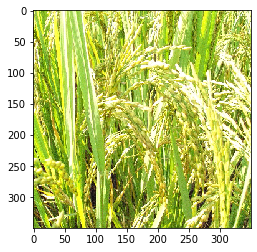

In [ ]:
img=image.load_img('ri1ce.jpg',target_size=(img_height,img_width,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_height,img_width,3)
classy=data.columns[2:]
y_prob=model.predict(img)
res=np.argsort(y_prob[0])

for i in range(4):
  print(str(i+1)+' '+classy[res[3-i]])

this crop is  Wheat


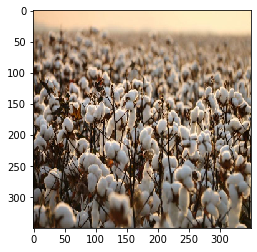

In [ ]:
img=image.load_img('test_data_9.jpg',target_size=(img_height,img_width,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_height,img_width,3)
classy=data.columns[2:]
y_prob=model.predict(img)
res=np.argsort(y_prob[0])
leng=len(res)-1
print("this crop is ",classy[res[leng]])

1 Rice
2 Cotton
3 Corn
4 Wheat


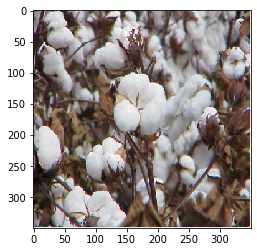

In [ ]:
img=image.load_img('mic_test4.jpg',target_size=(img_height,img_width,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_height,img_width,3)
classy=data.columns[2:]
y_prob=model.predict(img)
res=np.argsort(y_prob[0])

for i in range(4):
  print(str(i+1)+' '+classy[res[3-i]])

1 Wheat
2 Rice
3 Corn
4 Cotton


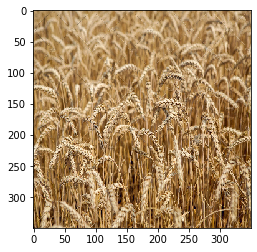

In [ ]:
img=image.load_img('whe1at.jpg',target_size=(img_height,img_width,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_height,img_width,3)
classy=data.columns[2:]
y_prob=model.predict(img)
res=np.argsort(y_prob[0])

for i in range(4):
  print(str(i+1)+' '+classy[res[3-i]])

1 Rice
2 Cotton
3 Corn
4 Wheat


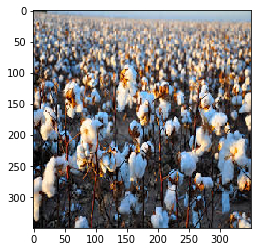

In [ ]:
img=image.load_img('cotto1n.jpg',target_size=(img_height,img_width,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_height,img_width,3)
classy=data.columns[2:]
y_prob=model.predict(img)
res=np.argsort(y_prob[0])
#print(y_prob)
for i in range(4):
  print(str(i+1)+' '+classy[res[3-i]])

1 Wheat
2 Cotton
3 Corn
4 Rice


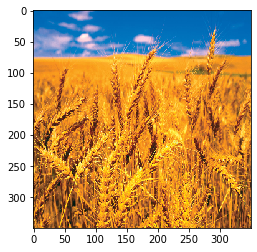

In [ ]:
img=image.load_img('test_data.jpg',target_size=(img_height,img_width,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_height,img_width,3)
classy=data.columns[2:]
y_prob=model.predict(img)
res=np.argsort(y_prob[0])m

for i in range(4):
  print(str(i+1)+' '+classy[res[3-i]])

In [ ]:
def result_pred(picture):
  img=image.load_img(picture+'.jpg',target_size=(img_height,img_width,3))
  plt.imshow(img)
  img=image.img_to_array(img)
  img=img/255.0
  img=img.reshape(1,img_height,img_width,3)
  classy=data.columns[2:]
  y_prob=model.predict(img)
  res=np.argsort(y_prob[0])
  leng=len(res)-1
  print("this crop is ",classy[res[leng]])

1 Corn
2 Cotton
3 Wheat
4 Rice


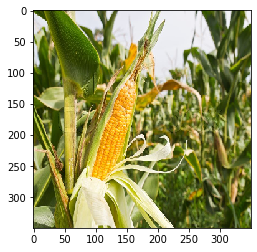

In [ ]:
img=image.load_img('cor2n.jpg',target_size=(img_height,img_width,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_height,img_width,3)
classy=data.columns[2:]
y_prob=model.predict(img)
res=np.argsort(y_prob[0])

for i in range(4):
  print(str(i+1)+' '+classy[res[3-i]])

1 Corn
2 Cotton
3 Rice
4 Wheat


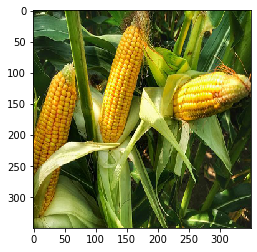

In [ ]:
img=image.load_img('mic_test5.jpg',target_size=(img_height,img_width,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0

img=img.reshape(1,img_height,img_width,3)
classy=data.columns[2:]
y_prob=model.predict(img)
res=np.argsort(y_prob[0])

for i in range(4):
  print(str(i+1)+' '+classy[res[3-i]])

In [ ]:
model_json = model.to_json()
with open("/content/gdrive/My Drive/agro_lens_dcnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/gdrive/My Drive/agro_lens_dcnn.h5")
print("Saved model to drive")

Saved model to drive
